In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [29]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [35]:
df["customerID"].duplicated().sum()

0

# converted 0 and 1 value of senior citizen to yes/no to make it easier to understand

In [37]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

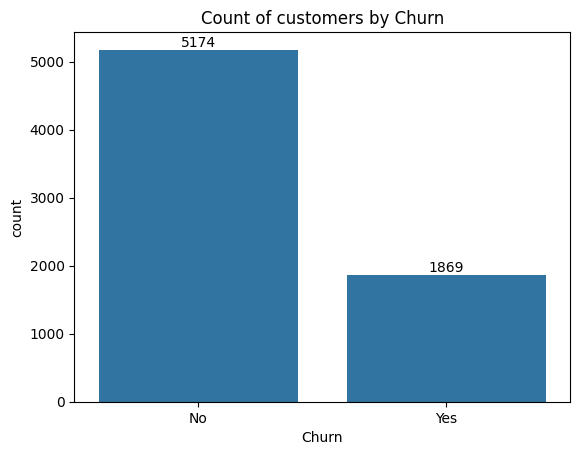

In [38]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

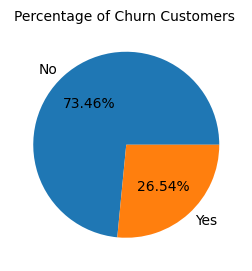

In [39]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb["Churn"],labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churn Customers ", fontsize = 10)
plt.show()

# from the given pie chart we can conclude that 26.54% of customers have churned out.not let's explore the reason behind it

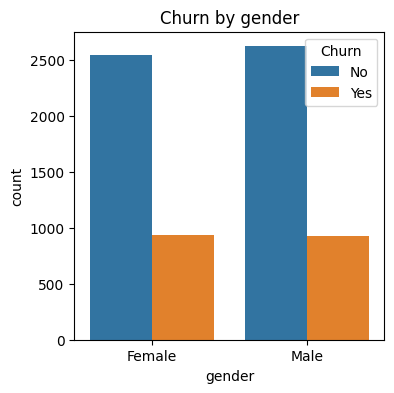

In [41]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df , hue = "Churn")
plt.title("Churn by gender")
plt.show()

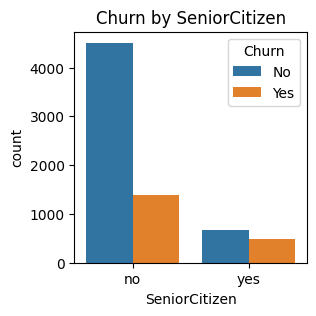

In [42]:
plt.figure(figsize = (3,3))
sns.countplot(x = "SeniorCitizen", data = df , hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

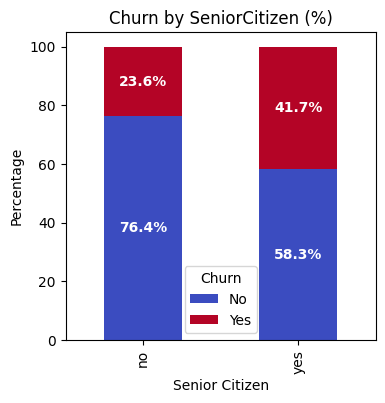

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample Data (Replace with your actual DataFrame)
# df = pd.read_csv("your_dataset.csv")

# Compute counts and percentages
counts = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figure size
counts.plot(kind="bar", stacked=True, ax=ax, colormap="coolwarm")

# Add Labels
for i, bars in enumerate(ax.containers):
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Avoid placing labels on empty sections
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + height / 2, 
                f"{height:.1f}%",  # Format to 1 decimal place
                ha="center", va="center", color="white", fontsize=10, fontweight="bold"
            )

# Titles and Labels
ax.set_title("Churn by SeniorCitizen (%)")
ax.set_ylabel("Percentage")
ax.set_xlabel("Senior Citizen")
ax.legend(title="Churn", loc="best")

plt.show()


# comparative a greated  percentage of people in senior citizen category have churned 

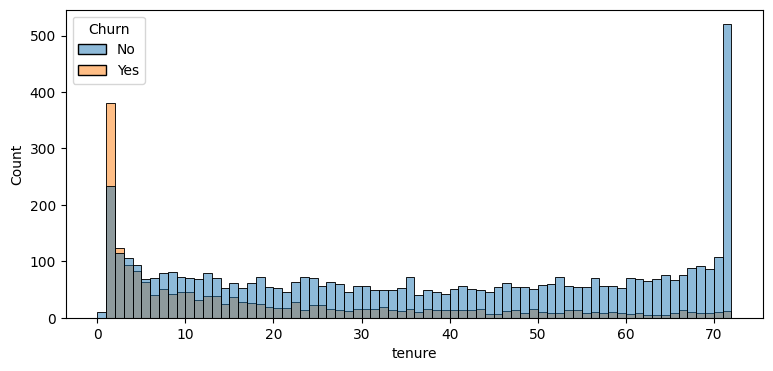

In [45]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df , bins = 72 , hue= "Churn")
plt.show()

# people who have used our services  for a long time have stayed  and people who have used our services #1  or  2 months have churned 

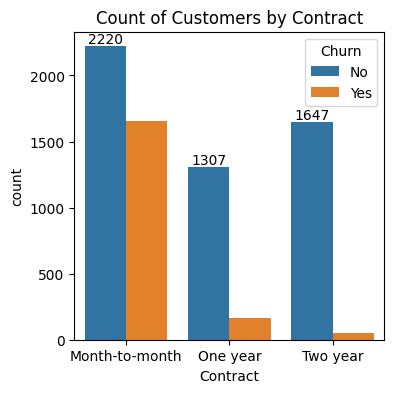

In [47]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df ,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

# people who have month to month contract  are likely  to churn  then from those have 1  or 2 or contract 

In [49]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

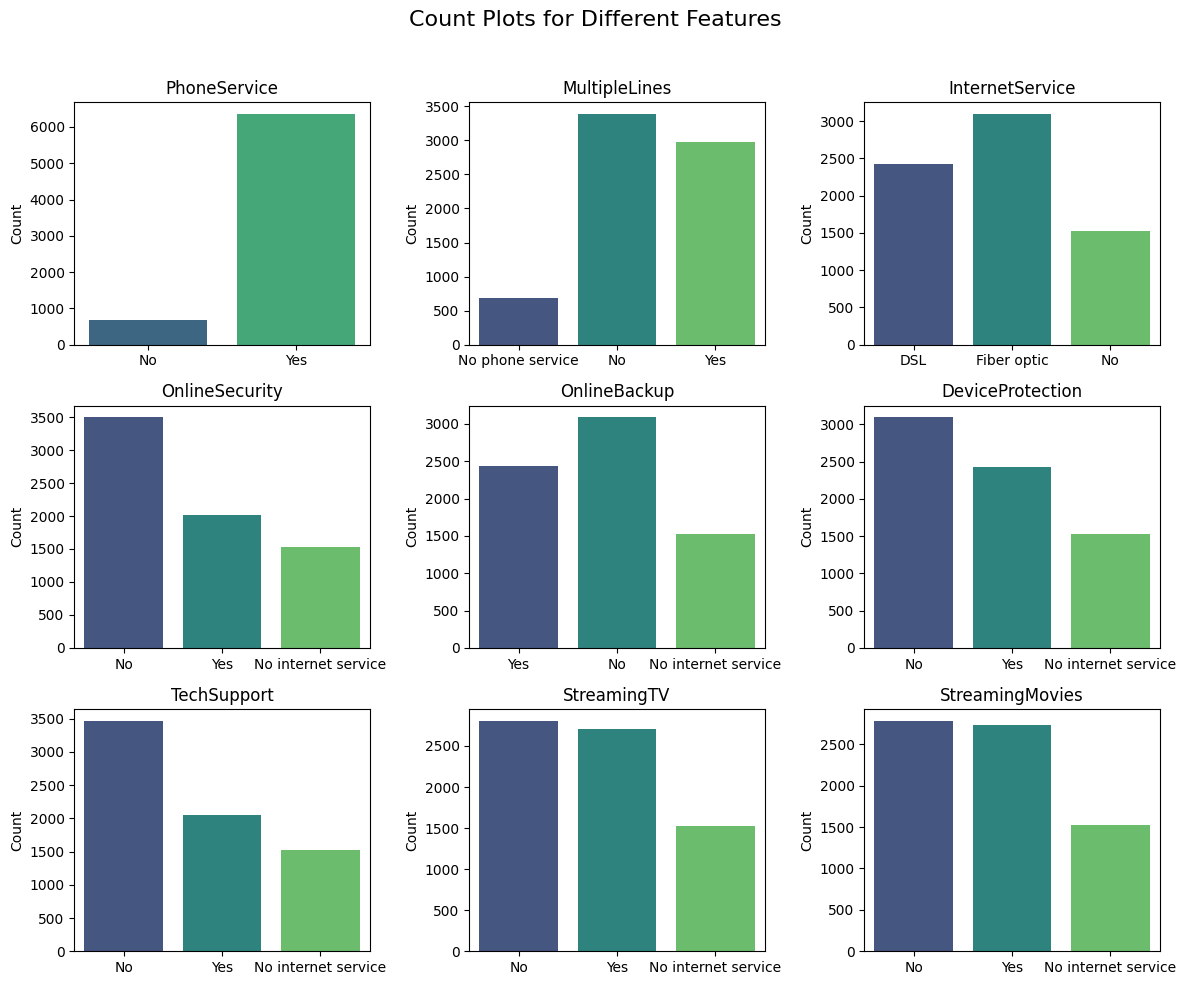

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of categorical columns
features = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set figure size and grid layout
fig, axes = plt.subplots(3, 3, figsize=(12, 10))  # 3 rows, 3 columns
fig.suptitle("Count Plots for Different Features", fontsize=16)

# Loop through each feature and create a subplot
for ax, feature in zip(axes.flatten(), features):
    sns.countplot(x=df[feature], ax=ax, hue=df[feature], palette="viridis", legend=False)
    ax.set_title(feature)
    ax.set_xlabel("")  # Remove x-axis label for clarity
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()


# The majority of customers who do not churn tend to have services  like phoneService, Internet Services (particularly DSL) and OnlineSecurity enabled .For Services like OnlineBackup ,Techsupport and Streming Tv ,churn rates are noticeably higher when these services  are not use  or are unavailable

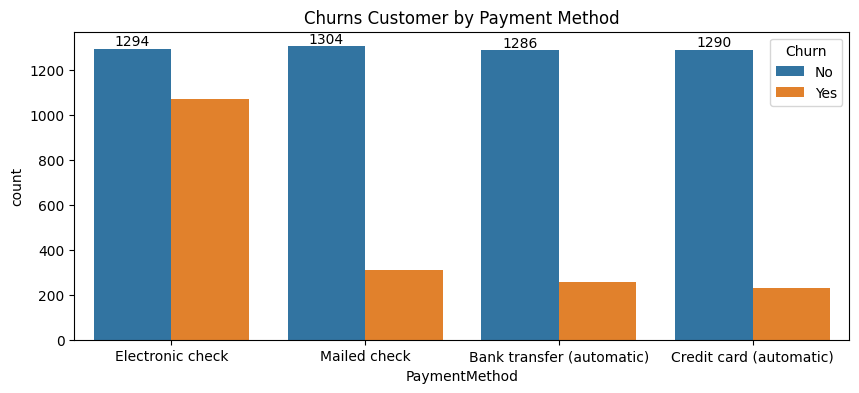

In [65]:
plt.figure(figsize = (10,4))
ax = sns.countplot(x = "PaymentMethod", data = df ,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churns Customer by Payment Method")
plt.show()

# Customer is likely to churn when he is using  electronic  check  as a payment 

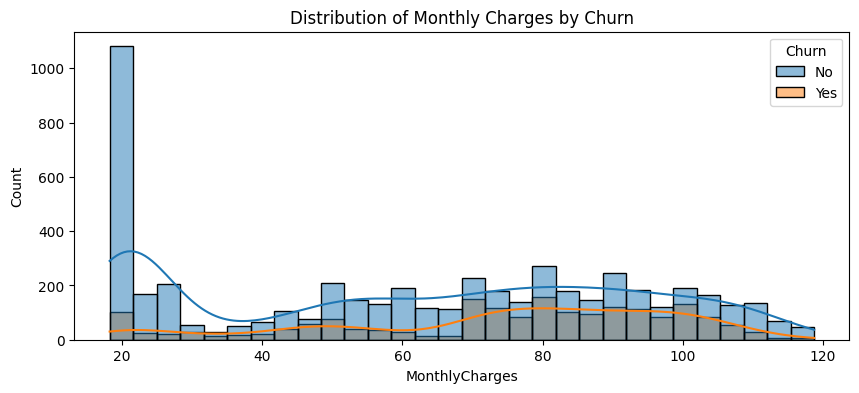

In [69]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", bins=30, kde=True)
plt.title("Distribution of Monthly Charges by Churn")
plt.show()

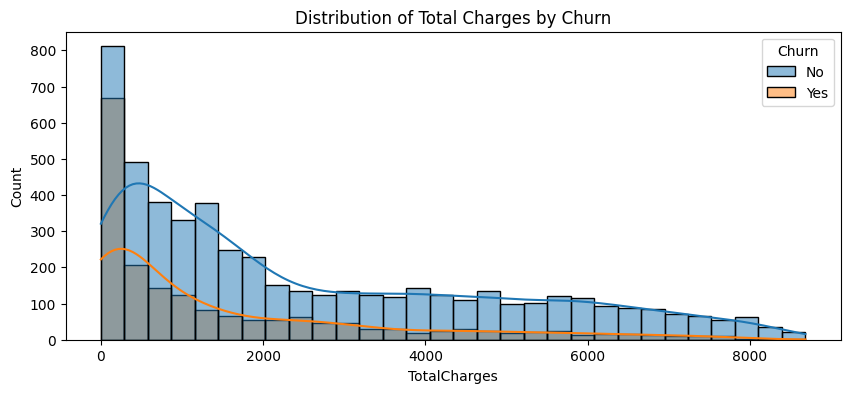

In [71]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="TotalCharges", hue="Churn", bins=30, kde=True)
plt.title("Distribution of Total Charges by Churn")
plt.show()